<a href="https://colab.research.google.com/github/vethssvikas/Emotions-in-Speech/blob/main/Emotions_in_a_speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # to use operating system dependent functionality
import librosa # to extract speech features
import wave # read and write WAV files
import matplotlib.pyplot as plt # to generate the visualizations
import soundfile
import librosa.display

# MLP Classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import keras
from tensorflow.keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import *


In [107]:
radvess_speech_labels = [] # to save extracted label/file
ravdess_speech_data = [] # to save extracted features/file


In [108]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [109]:

def extract_mfcc(wav_file_name):
    #This function extracts mfcc features and obtain the mean of each dimension
    #Input : path_to_wav_file
    #Output: mfcc_features'''
    y, sr = librosa.load(wav_file_name,duration=3
                                  ,offset=0.5)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    
    return mfccs

In [110]:
for dirname, dirs, filenames in os.walk('/content/gdrive/My Drive/voice/'):
    dirs[:] = [d for d in dirs if d in subset_dirs_list] # you can remove it to train the model over the entire dataset 
    for filename in filenames:
        radvess_speech_labels.append(int(filename[7:8]) - 1) # the index 7 and 8 of the file name represent the emotion label
        wav_file_name = os.path.join(dirname, filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name))
        
        
print("Finish Loading the Dataset")

Finish Loading the Dataset


In [112]:
RAV = "/content/gdrive/My Drive/RAVDESS"
# Run one example 
dir_list = os.listdir(RAV)
dir_list[0:5]

['Actor_16', 'Actor_19', 'Actor_17', 'Actor_15', 'Actor_22']

In [113]:
#### convert data and label to array
ravdess_speech_data_array = np.asarray(ravdess_speech_data) # convert the input to an array
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape # get tuple of array dimensions

#### make categorical labels
labels_categorical = to_categorical(ravdess_speech_label_array) # converts a class vector (integers) to binary class matrix
ravdess_speech_data_array.shape
labels_categorical.shape

(480, 8)

In [114]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + '/' +  i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

female_neutral     144
male_neutral       144
male_sad            96
male_surprise       96
male_happy          96
female_fear         96
female_happy        96
male_disgust        96
male_angry          96
female_angry        96
female_sad          96
female_disgust      96
female_surprise     96
male_fear           96
Name: labels, dtype: int64

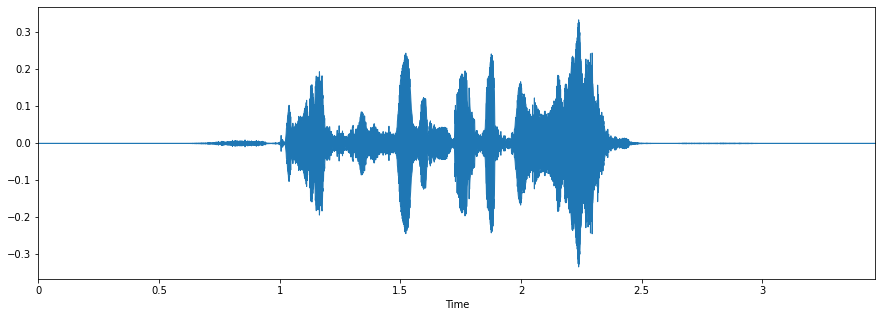

In [115]:
# Pick a fearful track
fname = RAV + '/' + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

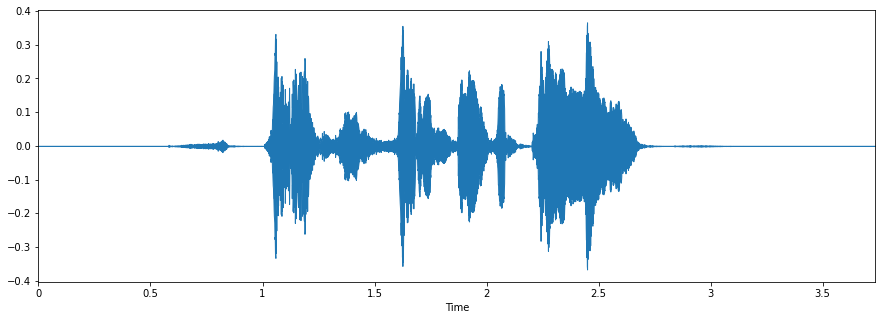

In [116]:
# Pick a happy track
fname = RAV + '/' + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

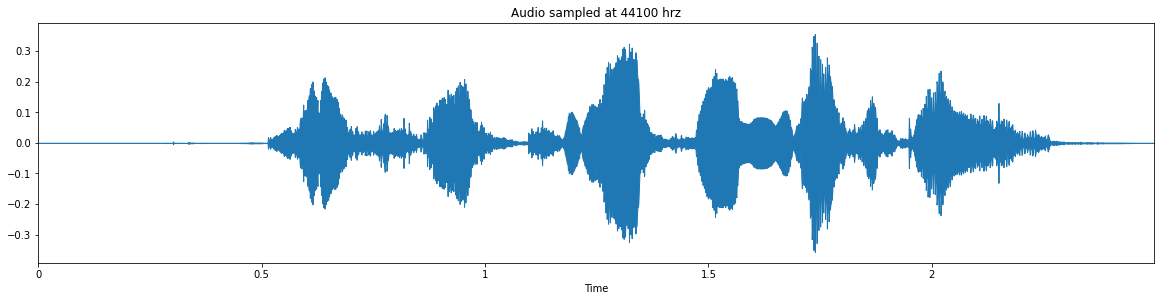

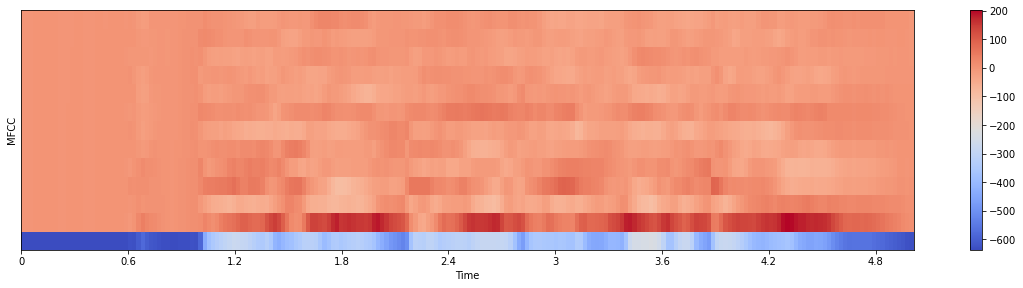

In [117]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = RAV + '/Actor_08/03-01-05-02-01-01-08.wav'
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

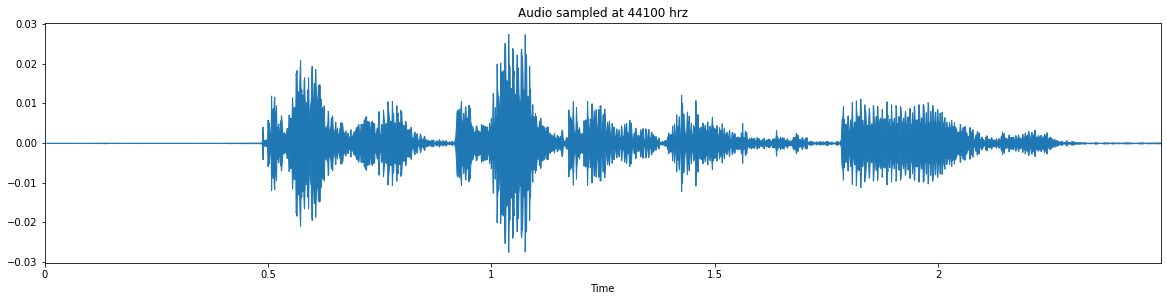

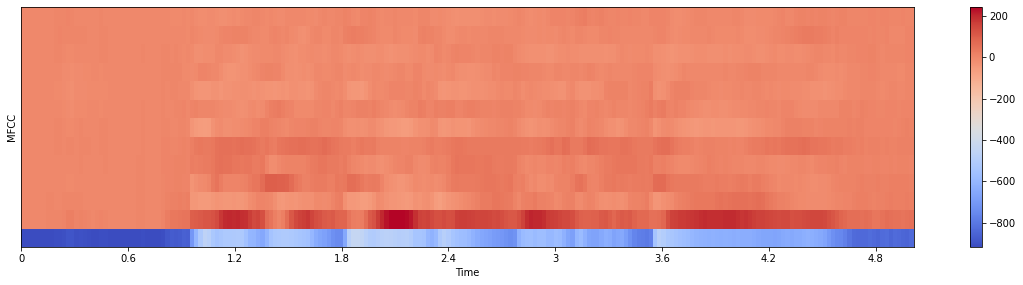

In [118]:
# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = RAV + '/Actor_09/03-01-05-01-01-01-09.wav'
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

In [16]:
x_train,x_test,y_train,y_test= train_test_split(np.array(ravdess_speech_data_array),labels_categorical, test_size=0.20, random_state=9)

In [17]:
ravdess_speech_data_array.shape

(480, 40)

In [18]:
labels_categorical.shape

(480, 8)

In [19]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=10000)

In [20]:
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [21]:
y_pred=model.predict(x_test)

In [22]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 46.88%


In [23]:
# Split the training, validating, and testing sets
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [24]:
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [74]:
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=300, shuffle=True)

Epoch 1/300
12/12 [==============================] - 4s 115ms/step - loss: 2.0729 - accuracy: 0.1419 - val_loss: 2.0835 - val_accuracy: 0.1042
Epoch 2/300
12/12 [==============================] - 0s 39ms/step - loss: 2.0518 - accuracy: 0.1439 - val_loss: 2.0770 - val_accuracy: 0.2083
Epoch 3/300
12/12 [==============================] - 0s 41ms/step - loss: 2.0251 - accuracy: 0.1573 - val_loss: 2.0694 - val_accuracy: 0.1667
Epoch 4/300
12/12 [==============================] - 0s 40ms/step - loss: 2.0398 - accuracy: 0.1906 - val_loss: 2.0580 - val_accuracy: 0.1667
Epoch 5/300
12/12 [==============================] - 0s 41ms/step - loss: 1.9993 - accuracy: 0.2046 - val_loss: 2.0394 - val_accuracy: 0.1667
Epoch 6/300
12/12 [==============================] - 0s 42ms/step - loss: 1.9817 - accuracy: 0.2183 - val_loss: 1.9984 - val_accuracy: 0.1667
Epoch 7/300
12/12 [==============================] - 1s 43ms/step - loss: 1.9690 - accuracy: 0.2279 - val_loss: 1.9600 - val_accuracy: 0.2083
Epoch

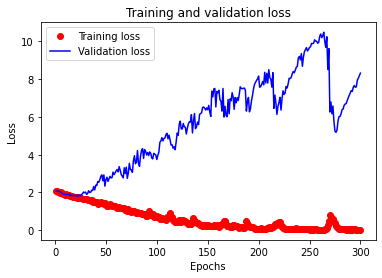

In [75]:
### loss plots using LSTM model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

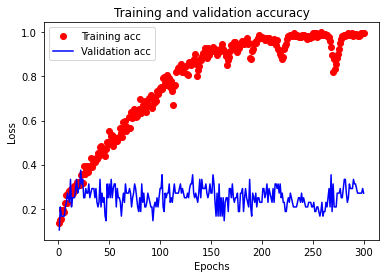

In [76]:
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [77]:
### evaluate using model A
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1), labels_categorical[training_samples + validation_samples:])

2/2 [==============================] - 0s 16ms/step - loss: 12.3001 - accuracy: 0.1250


[12.300074577331543, 0.125]

In [78]:
from google.colab import files
files.upload()

Saving download.wav to download (2).wav


{'download.wav': b'RIFF$\xc0\n\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x02\x00D\xac\x00\x00\x10\xb1\x02\x00\x04\x00\x10\x00data\x00\xc0\n\x00Z\x00Z\x00X\x00Y\x00Y\x00Y\x00Y\x00X\x00Y\x00Y\x00Y\x00Y\x00X\x00X\x00X\x00X\x00X\x00X\x00X\x00X\x00X\x00X\x00W\x00X\x00X\x00X\x00W\x00W\x00W\x00W\x00W\x00W\x00X\x00W\x00V\x00W\x00W\x00W\x00W\x00W\x00W\x00W\x00W\x00W\x00V\x00V\x00V\x00V\x00V\x00V\x00V\x00V\x00V\x00V\x00U\x00V\x00V\x00V\x00V\x00V\x00V\x00V\x00V\x00V\x00V\x00V\x00V\x00V\x00W\x00V\x00V\x00V\x00V\x00V\x00V\x00V\x00W\x00V\x00V\x00V\x00W\x00W\x00V\x00V\x00V\x00U\x00W\x00W\x00V\x00V\x00V\x00V\x00V\x00V\x00V\x00W\x00V\x00V\x00V\x00W\x00V\x00V\x00V\x00V\x00U\x00T\x00U\x00U\x00U\x00U\x00U\x00U\x00U\x00U\x00U\x00U\x00T\x00T\x00T\x00U\x00U\x00U\x00U\x00T\x00U\x00U\x00U\x00U\x00U\x00U\x00U\x00U\x00U\x00V\x00U\x00V\x00U\x00U\x00T\x00T\x00T\x00T\x00U\x00S\x00T\x00U\x00S\x00T\x00T\x00T\x00T\x00T\x00T\x00T\x00S\x00T\x00T\x00T\x00S\x00T\x00S\x00T\x00S\x00S\x00S\x00S\x00R\x00S\x00S\x00S\x00S\x00S\x00S\x

In [79]:
import IPython.display as ipd
ipd.Audio('download.wav')

In [80]:
!pip install pydub

In [82]:
from pydub import AudioSegment
sound = AudioSegment.from_wav('download.wav')
sound = sound.set_channels(1)
sound.export('download.wav', format="wav")


<_io.BufferedRandom name='download.wav'>

In [83]:
ipd.Audio('download.wav')

In [84]:
a = extract_mfcc('download.wav')

In [85]:
a1 = np.asarray(a)

In [86]:
a.shape

(40,)

In [87]:
q = np.expand_dims(a1,-1)
qq = np.expand_dims(q,0)

In [88]:
pred = model_A.predict(qq)

In [94]:
pred

array([[7.6576625e-06, 2.5199835e-05, 1.2671569e-04, 1.7422519e-03,
        1.3287051e-01, 8.6520791e-01, 1.7435683e-05, 2.2791842e-06]],
      dtype=float32)

In [93]:
preds=pred.argmax(axis=1)
preds

array([5])